## Bayesian statistics

**Bayesian statistics** allows you to update prior beliefs into posterior probabilities in a logically
consistent manner. Before we have collected data, the prior odds of Hypothesis 1 (H1)
over the null-hypothesis (H0) are P(H1)/P(H0), After we have collected data, we have the
posterior odds P(H1|D)/P(H0|D), which you can read as the probability of H1, given the
data, divided by the probability of H0, given the data. 

### Bayes factor

- **model comparison** - comparison of different models that might explain the data
- **absolute evidence** - also reffered as **marginal likelihood**, uses prior probabilities to average the likelihood across the parameter space
- When comparing models, we do not use the absolute evidence for a model, but the **relative evidence** for models we are comparing 
- relative evidence is calculated by dividing the marginal likelihood for one model by the marginal likelihood for another model, and this ratio of relative evidence based on these marginal likelihoods is called the **Bayes factor**
- **Bayes factor** represents how much we have updated our beliefs, based on observing the data 
- We can express Bayes factors to indicate how much more likely H1 is given the data compared to H0 (often indicated by B10) or as how much more likely H0 has become compared to H1 (B$_{01}$), and B10 = 1/B$_{01}$
-  Similar to likelihood ratios, a Bayes factor of 1 did not change our beliefs for one model compared to the other model.
- A very large Bayes factor for H1 over H0 has increased our belief in H1, and a Bayes Factor close for H1 over H0 to 0 has increased our belief in H0.
-  If our prior belief in H1 was very, very low (e.g., your belief in unicorns) even a large Bayes factor that supports the presence of a unicorn might not yet convince you that unicorns are real – but you have updated your belief in unicorns, and now believe they are at least more likely then they were before (even if you still think unicorns are very unlikely to exist).
- the Bayes Factor and the prior in calculating the posterior odds is clear in the following formula:

$\frac{P(H1|D)}{P(H0|D)} = \frac{P(D|H1)}{P(H0|D)} \times \frac{P(H1)}{P(H0)}$

$Posterior Probability = Bayes Factor \times Prior Probability$

- A Bayesian analysis of data requires specifying the prior.
- In Bayesian statistics, parameters are considered to be random variables, and the uncertainty or degree of belief with respect to the parameters is quantified by probability distributions.
- You could draw any probability density you want over 0 and 1, and turn it into a prior, but for good reasons (simplicity, mostly) a betaprior is often used for binomial probabilities.
- The shape of the beta-prior depends on two parameters, $\alpha$ and $\beta$. 
- The $\alpha$ and $\beta$ in binomial probabilities are unrelated to error rates, and the use of the same letters is mainly due to a lack of creativity among statisticians and the limited choice the alphabet gives us.

The **probability density function** is:

$\int (x, \alpha, \beta) = \frac {1}{B(\alpha, \beta)} x^{\alpha - 1}(1-x)^{\beta - 1}$

where $B(\alpha, \beta)$ is the beta function (https://en.wikipedia.org/wiki/Beta_distribution). 

The **posterior distribution** is a Beta distribution with Beta($\alpha*$, $\beta*$):<br/>
n = 20 <br/>
x = 10 <br/>
$\alpha$ = 1 <br/>
$\beta$ = 1 <br/>

$\alpha* = \alpha + x = 1 + 10 = 11$ <br/>
$\beta* = \beta + n - x = 1 + 20 - 10 = 11$

or

$\alpha* = \alpha_{prior} + \alpha_{likelihood} - 1= 1 + 11 - 1 = 11$ <br/>
$\beta* = \beta_{prior} + \beta_{likelihood} - 1 = 1 + 11 - 1 = 11$

Posterior distribution is identical to the likelihood function when a
uniform prior is used!!!

The **Bayes Factor** is used to quantify this increase in relative evidence.

The Bayes Factor is simply the value of the posterior distribution at θ = 0.5, divided by the value of the prior
distribution at θ = 0.5. You can check this in an online Bayes Factor calculator by Jeff Rouder and Richard Morey:
http://pcl.missouri.edu/bf-binomial. 

### Bayes factor calculation

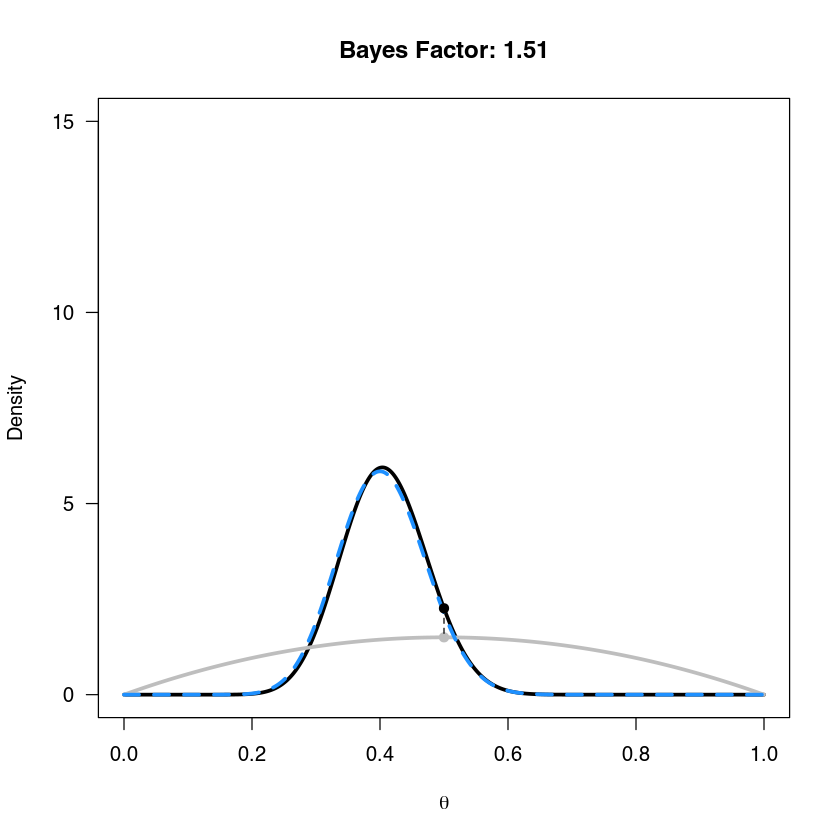

In [42]:
H0<-0.5 #Set the point null hypothesis you want to calculate the Bayes Factor for
n<-50 #set total trials
x<-20 #set successes
aprior<-2 #Set the alpha for the Beta distribution for the prior
bprior<-2 #Set the beta for the Beta distribution for the prior

alikelihood<-x+1 #Calculate the alpha for the Beta distribution for the likelihood
blikelihood<-n-x+1 #Calculate the beta for the Beta distribution for the likelihood
aposterior<-aprior+alikelihood-1 #Calculate the alpha for the Beta distribution for the posterior
bposterior<-bprior+blikelihood-1 #Calculate the beta for the Beta distribution for the posterior

theta<-seq(0,1,0.001) #create theta range from 0 to 1
#png(file="PriorLikelihoodPosterior.png",width=3000,height=3000, res = 500)
prior <- dbeta(theta, aprior, bprior)
likelihood <- dbeta(theta, alikelihood, blikelihood)
posterior <- dbeta(theta, aposterior, bposterior)
plot(theta, posterior, ylim=c(0, 15), type = "l", lwd = 3, xlab = bquote(theta), ylab = "Density", las = 1)
lines(theta, prior, col="grey", lwd = 3)
lines(theta, likelihood, lty = 2, lwd = 3, col="dodgerblue")
BF10<-dbeta(H0, aposterior, bposterior)/dbeta(H0, aprior, bprior)
points(H0,dbeta(H0, aposterior, bposterior), pch = 19)
points(H0,dbeta(H0, aprior, bprior), pch = 19, col="grey")
segments(H0, dbeta(H0, aposterior, bposterior), H0, dbeta(H0, aprior, bprior), lty=2)
title(paste('Bayes Factor:',round(BF10,digits=2)))
#dev.off()

#Š Daniel Lakens, 2016. 
# This work is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License. https://creativecommons.org/licenses/by-nc-sa/4.0/

A Bayes factor:
- between 1 and 3 is considered ‘not worth more than a bare mention’, 
- larger than 3 (or smaller than 1/3) is considered ‘substantial’, 
- and larger than 10 (or smaller than 1/10) is considered ‘strong’.

These labels refer to the increase in how much you believe a specific hypothesis, not in
the posterior belief in that hypothesis.

### Bayesian estimation

**Credible interval** -  a Bayesian version of a confidence interval with a slightly different interpretation. Instead of the Frequentist interpretation where a parameter has one (unknown) true value, the Bayesian approach
considers the data fixed, but allow the parameter to vary. In Bayesian approaches,
probability distributions represent our degree of belief. When calculating a credible
interval, one is saying ‘I believe it is 95% probable (given my prior and the data) that the
true parameter falls within this credible interval’. A 95% credible interval is simply the area
of the posterior distribution between the 0.025 and 0.975 quantiles.


- A credible interval and a confidence interval are the same, when a uniform prior (e.g., Beta(1,1)) is used.
- In this case, credible interval is numerically identical to the confidence interval. 
- Only the interpretation differs. Whenever an informed prior is used, the credible interval and confidence interval differ. 
-  If the chosen prior is not representative of the truth, the credible interval will not be representative of the truth, but it is always a correct formalization of your beliefs. 
- For a single confidence interval, the probability that it contains the true population parameter is either 0 or 1. Only in the long run will 95% of confidence intervals contain the true population parameter

The **highest density interval** is an alternative to the credible interval that works better when the posterior beta distribution is skewed (and is identical when the posterior distribution is symmetrical). 

method,x,n,shape1,shape2,mean,lower,upper,sig
bayes,0,10,10,20,0.3333333,0,0.4790119,0.05


method,x,n,shape1,shape2,mean,lower,upper,sig
bayes,0,10,10,20,0.3333333,0,0.4790119,0.05


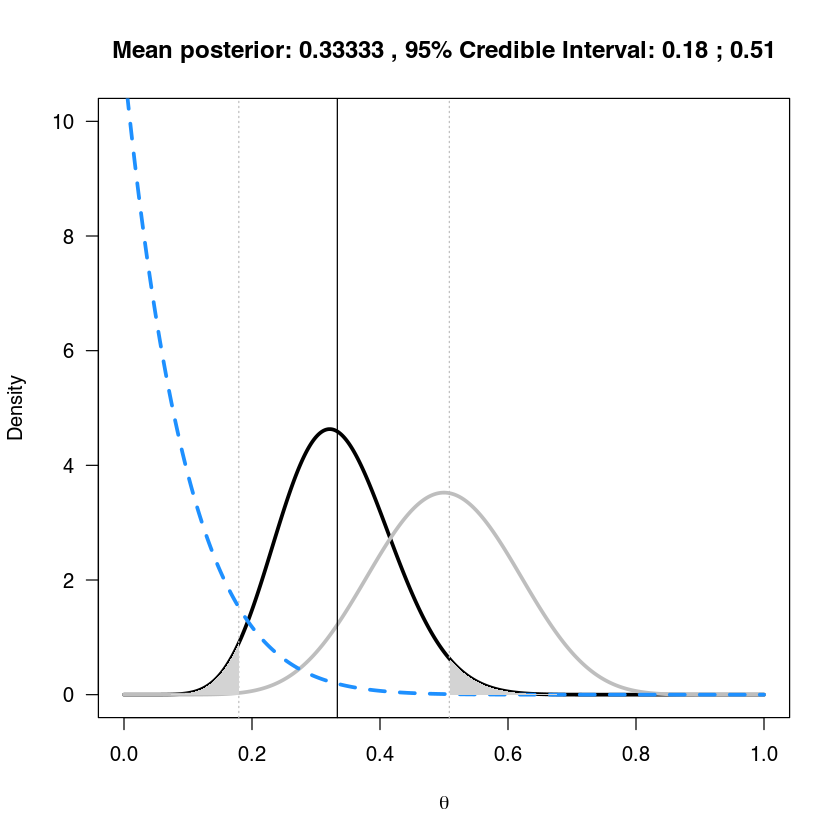

In [43]:
H0<-0.5 #Set the point null hypothesis you want to calculate the Bayes Factor for
n<-10 #set total trials
x<-0 #set successes
aprior<-10 #Set the alpha for the Beta distribution for the prior
bprior<-10 #Set the beta for the Beta distribution for the prior

ymax<-10 #set max y-axis

alikelihood<-x+1 #Calculate the alpha for the Beta distribution for the likelihood
blikelihood<-n-x+1 #Calculate the beta for the Beta distribution for the likelihood
aposterior<-aprior+alikelihood-1 #Calculate the alpha for the Beta distribution for the posterior
bposterior<-bprior+blikelihood-1 #Calculate the beta for the Beta distribution for the posterior

theta<-seq(0,1,0.001) #create theta range from 0 to 1
#png(file="BinomialPosteriorMean.png",width=4000,height=4000, res = 500)
prior <- dbeta(theta, aprior, bprior) #deterine prior distribution
likelihood <- dbeta(theta, alikelihood, blikelihood) #determine likelihood distribution
posterior <- dbeta(theta, aposterior, bposterior) #determine posterior distribution
plot(theta, posterior, ylim=c(0, ymax), type = "l", lwd = 3, xlab = bquote(theta), ylab = "Density", las = 1) #draw posterior distribution
lines(theta, prior, col="grey", lwd = 3) #draw prior distribution
lines(theta, likelihood, lty = 2, lwd = 3, col="dodgerblue") #draw likelihood distribution
LL<-qbeta(.025,aposterior, bposterior) #calculate lower limit credible interval
UL<-qbeta(.975,aposterior, bposterior) #calculate upper limit credible interval
abline(v = aposterior/(aposterior+bposterior)) #draw line mean
abline(v = LL, col="grey",lty=3) #draw line lower limit
abline(v = UL, col="grey",lty=3) #draw line upper limit
polygon(c(theta[theta<LL],rev(theta[theta<LL])),c(posterior[theta<LL], rep(0,sum(theta<LL))),col="lightgrey",border=NA)
polygon(c(theta[theta>UL],rev(theta[theta>UL])),c(posterior[theta>UL], rep(0,sum(theta>UL))),col="lightgrey",border=NA)
title(paste('Mean posterior:',round((aposterior/(aposterior+bposterior)),digits=5),", 95% Credible Interval:",round(LL,digits=2),";",round(UL,digits=2)))
#dev.off()

if(!require(binom)){install.packages('binom')}
library(binom)
binom.bayes(x, n, type = "central", prior.shape1 = aprior, prior.shape2 = bprior)
binom.bayes(x, n, type = "highest", prior.shape1 = aprior, prior.shape2 = bprior)

#Š Daniel Lakens, 2016. 
# This work is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License. https://creativecommons.org/licenses/by-nc-sa/4.0/

In [ ]:
https://en.wikipedia.org/wiki/Problem_of_induction